![Coca Cola](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Coca-Cola_logo.svg/640px-Coca-Cola_logo.svg.png) ![Coca Cola](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e8/15-09-26-RalfR-WLC-0098_-_Coca-Cola_glass_bottle_%28Germany%29.jpg/135px-15-09-26-RalfR-WLC-0098_-_Coca-Cola_glass_bottle_%28Germany%29.jpg)

<h1 style="color:hotpink; font-style:italic; text-decoration:underline;">Coca Cola Models</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Input, LSTM

In [2]:
df=pd.read_csv("Coca-Cola_stock_history.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [5]:
df.shape

(15311, 8)

In [6]:
def extract_date(value):
    return pd.to_datetime(value).date()
df['updated_date'] = df['Date'].apply(extract_date)

In [7]:
df['updated_date']=pd.to_datetime(df['updated_date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          15311 non-null  object        
 1   Open          15311 non-null  float64       
 2   High          15311 non-null  float64       
 3   Low           15311 non-null  float64       
 4   Close         15311 non-null  float64       
 5   Volume        15311 non-null  int64         
 6   Dividends     15311 non-null  float64       
 7   Stock Splits  15311 non-null  int64         
 8   updated_date  15311 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 1.1+ MB


In [9]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
updated_date    0
dtype: int64

In [10]:
df.dropna()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,updated_date
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0,1962-01-02
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0,1962-01-03
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0,1962-01-04
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0,1962-01-05
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0,1962-01-08
...,...,...,...,...,...,...,...,...,...
15306,2022-10-20 00:00:00-04:00,55.770000,55.919998,54.959999,55.080002,16905100,0.0,0,2022-10-20
15307,2022-10-21 00:00:00-04:00,55.000000,56.110001,54.990002,55.959999,15028000,0.0,0,2022-10-21
15308,2022-10-24 00:00:00-04:00,56.639999,57.730000,56.570000,57.570000,17416700,0.0,0,2022-10-24
15309,2022-10-25 00:00:00-04:00,59.040001,59.110001,57.750000,58.950001,28829900,0.0,0,2022-10-25


In [11]:
df.drop(columns={'Dividends','Stock Splits'},inplace=True)

In [12]:
df.head()

,Date,Open,High,Low,Close,Volume,updated_date
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,1962-01-02
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,1962-01-03
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,1962-01-04
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,1962-01-05
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,1962-01-08


# *Exploratory Data Analysis (EDA)*

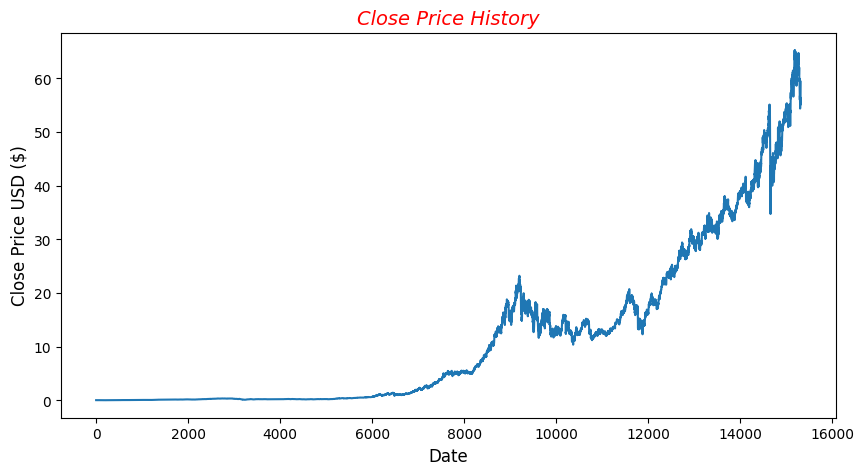

In [13]:
# Visualizing the closing price history
plt.figure(figsize=(10,5))
plt.title('Close Price History',c='r',fontstyle='italic',fontsize=14)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)',fontsize=12)
plt.show()

In [14]:
# Using the 'Close' column for prediction
data = df.filter(['Close'])
dataset = data.values

## *LSTM Model*

In [15]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [16]:
# Splitting the data into training and testing sets
train_size = int(len(dataset) * 0.8)
train_data = scaled_data[0:train_size, :]
test_data = scaled_data[train_size - 60:, :]

# Preparing the data for LSTM model
def create_dataset(data, look_back=60):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 60
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

In [17]:
# Reshape input to be [samples, time steps, features] for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

**Training and Building the LSTM Model**

In [18]:
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, batch_size=1, epochs=1)

12188/12188 ━━━━━━━━━━━━━━━━━━━━ 226s 18ms/step - loss: 2.2072e-04


In [20]:
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

rmse = np.sqrt(np.mean(((lstm_predictions - y_test) ** 2)))
print('LSTM Model RMSE:', rmse)

96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
LSTM Model RMSE: 37.627263606013194


### *Visualization*

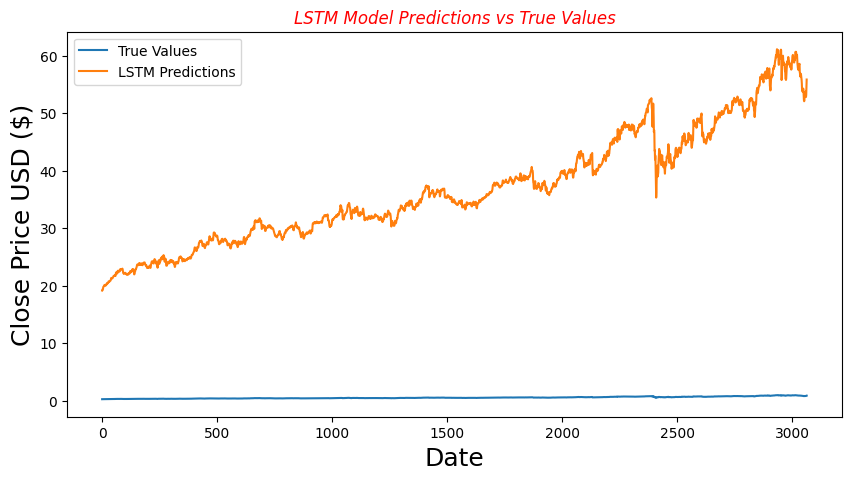

In [21]:
# Visualizing the Results for LSTM
plt.figure(figsize=(10,5))
plt.title('LSTM Model Predictions vs True Values',c='r',fontstyle='italic')
plt.plot(y_test, label='True Values')
plt.plot(lstm_predictions, label='LSTM Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()

## *SVR Model*

In [22]:
# Preparing the data for SVR model
X = data.index.values.reshape(-1, 1)
y = data['Close'].values

In [23]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [24]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Training the SVR Model
svr_model = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_model.fit(X_train_scaled, y_train)

SVR(C=1000.0, gamma=0.1)

#### *In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org*

In [26]:
# Predicting and evaluating the SVR model
svr_predictions = svr_model.predict(X_test_scaled)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_predictions))
print('SVR Model RMSE:', svr_rmse)

SVR Model RMSE: 31.388272265004012


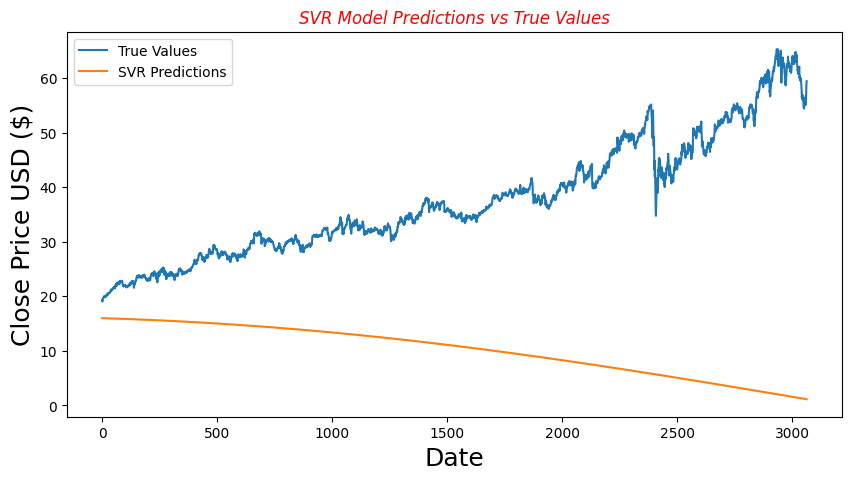

In [27]:
# Visualizing the Results for SVR
plt.figure(figsize=(10,5))
plt.title('SVR Model Predictions vs True Values',c='r',fontstyle='italic')
plt.plot(y_test, label='True Values')
plt.plot(svr_predictions, label='SVR Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()

## *SGD Regressor Model*

In [28]:
# Preparing the data for SGD Regressor model
X = data.index.values.reshape(-1, 1)
y = data['Close'].values

In [29]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [30]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Training the SGD Regressor Model
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_model.fit(X_train_scaled, y_train)

SGDRegressor()

#### *In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org*



In [32]:
# Predicting and evaluating the SGD model
sgd_predictions = sgd_model.predict(X_test_scaled)
sgd_rmse = np.sqrt(mean_squared_error(y_test, sgd_predictions))
print('SGD Model RMSE:', sgd_rmse)

SGD Model RMSE: 21.996835656748914


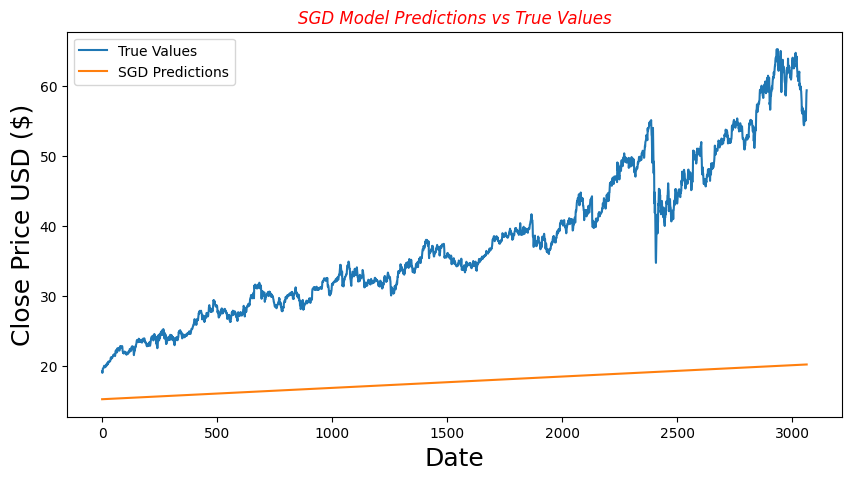

In [33]:
# Visualizing the Results for SGD
plt.figure(figsize=(10,5))
plt.title('SGD Model Predictions vs True Values',c='r',fontstyle='italic')
plt.plot(y_test, label='True Values')
plt.plot(sgd_predictions, label='SGD Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()

## *Decision Tree Regressor Model*

In [34]:
# Preparing the data for Decision Tree Regressor model
X = data.index.values.reshape(-1, 1)
y = data['Close'].values

In [35]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Training the Decision Tree Regressor Model
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor()

#### *In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org*

In [36]:
# Predicting and evaluating the Decision Tree model
dtr_predictions = dtr_model.predict(X_test)
dtr_rmse = np.sqrt(mean_squared_error(y_test, dtr_predictions))
print('Decision Tree Model RMSE:', dtr_rmse)

Decision Tree Model RMSE: 21.608274306195128


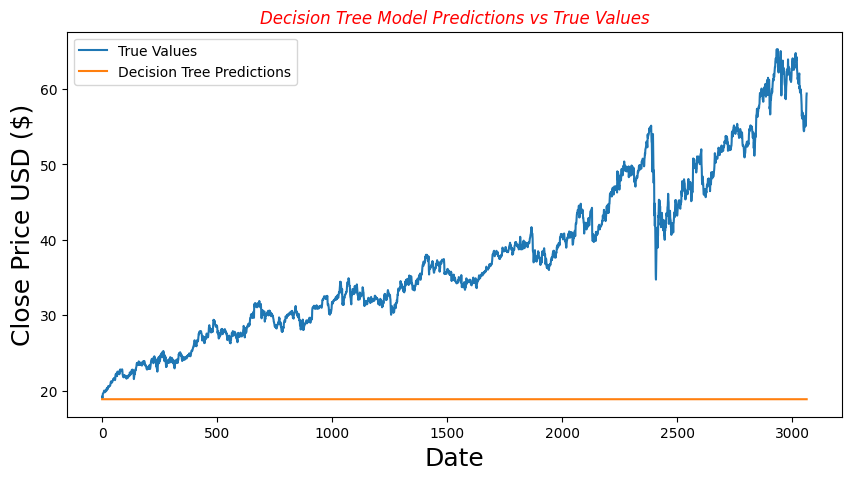

In [37]:
# Visualizing the Results for Decision Tree
plt.figure(figsize=(10,5))
plt.title('Decision Tree Model Predictions vs True Values',c='r',fontstyle='italic')
plt.plot(y_test, label='True Values')
plt.plot(dtr_predictions, label='Decision Tree Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()

## *Random Forest Regressor Model*

In [38]:
# Preparing the data for Random Forest Regressor model
X = data.index.values.reshape(-1, 1)
y = data['Close'].values

In [39]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Training the Random Forest Regressor Model
rfr_model = RandomForestRegressor(n_estimators=100)
rfr_model.fit(X_train, y_train)

RandomForestRegressor()

#### *In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org*

In [40]:
# Predicting and evaluating the Random Forest model
rfr_predictions = rfr_model.predict(X_test)
rfr_rmse = np.sqrt(mean_squared_error(y_test, rfr_predictions))
print('Random Forest Model RMSE:', rfr_rmse)

Random Forest Model RMSE: 21.57191008635861


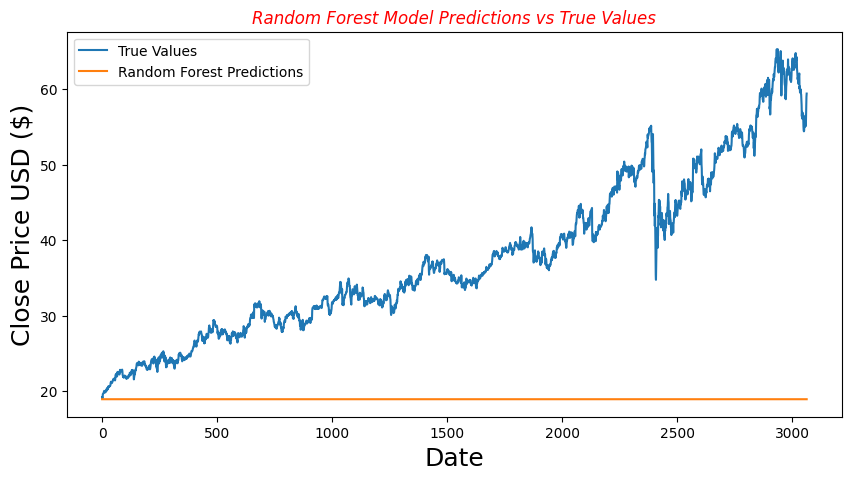

In [41]:
# Visualizing the Results for Random Forest
plt.figure(figsize=(10,5))
plt.title('Random Forest Model Predictions vs True Values',c='r',fontstyle='italic')
plt.plot(y_test, label='True Values')
plt.plot(rfr_predictions, label='Random Forest Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()